<a href="https://colab.research.google.com/github/NajdekMonika/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes 130-US hospitals for years 1999-2008 Dataset

In [10]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import scipy
from sklearn import metrics

In [3]:
!git clone https://github.com/NajdekMonika/Diabetes

Cloning into 'Diabetes'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 88 (delta 5), reused 81 (delta 4), pack-reused 0
Receiving objects: 100% (88/88), 3.18 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [4]:
%ls Diabetes/Diabetes-130-US/

diabetic_data.csv  IDS_mapping.csv


In [8]:
IDS_mapping = pd.read_csv("Diabetes/Diabetes-130-US/IDS_mapping.csv")

In [9]:
IDS_mapping.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [11]:
IDS_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [24]:
df = pd.read_csv("Diabetes/Diabetes-130-US/diabetic_data.csv")

In [25]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

In [38]:
df['medical_specialty'].value_counts()*100/len(df)

?                                49.082208
InternalMedicine                 14.381031
Emergency/Trauma                  7.433720
Family/GeneralPractice            7.310890
Cardiology                        5.259124
                                   ...    
SportsMedicine                    0.000983
Speech                            0.000983
Perinatology                      0.000983
Neurophysiology                   0.000983
Pediatrics-InfectiousDiseases     0.000983
Name: medical_specialty, Length: 73, dtype: float64

Percentage of null values in medical_specialty column is less than 50%, so there is no need to drop the entire column.

In [43]:
df['payer_code'].value_counts()*100/len(df)

?     39.557416
MC    31.876069
HM     6.165124
SP     4.920111
BC     4.574219
MD     3.470707
CP     2.489043
UN     2.405519
CM     1.903386
OG     1.015074
PO     0.581727
DM     0.539473
CH     0.143466
WC     0.132657
OT     0.093351
MP     0.077629
SI     0.054046
FR     0.000983
Name: payer_code, dtype: float64

Percentage of null values in payer_code column is less than 50%, so there is no need to drop the entire column.

In [45]:
df['weight'].value_counts()*100/len(df)

?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64

Percentage of null values in weight column is more than 50%, so there is a need to drop the entire column.

In [ ]:
df.drop(['weight'], axis=1)

In [46]:
df['race'].value_counts().idxmax()

'Caucasian'

In [ ]:
df.replace({'diag_1' : '?', 'diag_2' : '?', 'diag_3' : '?', 'medical_specialty' : '?', 'payer_code' : '?', 'race' : '?'},
           {'diag_1' : df['diag_1'].value_counts().idxmax(),
            'diag_2' : df['diag_2'].value_counts().idxmax(),
            'diag_3' : df['diag_3'].value_counts().idxmax(),
            'medical_specialty' : df['medical_specialty'].value_counts().index.tolist()[1],
            'payer_code' : df['payer_code'].value_counts().index.tolist()[1],
            'race' : df['diag_3'].value_counts().idxmax()},
           inplace=True)

In [32]:
df["medical_specialty"].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [16]:
drug_map = {'no' : 0, 'down' : 1, 'steady' : 2, 'up' : 3}
drug_columns = list(df.columns)[24:47]

readmitted_map = {'NO' : 0, '>30' : 1, '<30' : 2}

diabetesMed_map = {'No' : 0, 'Yes' : 1}

change_map = {'No' : 0, 'Ch' : 1}

A1Cresult_map = {'None' : 0, 'Norm' : 1, '>7' : 2, '>8' : 3}

max_glu_serum_map = {'None' : 0, 'Norm' : 1, '>200' : 2, '>300' : 3}

#Diabetes Dataset

In [ ]:
!git clone https://github.com/NajdekMonika/Diabetes

Cloning into 'Diabetes'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 80 (delta 3), reused 76 (delta 3), pack-reused 0
Receiving objects: 100% (80/80), 133.48 KiB | 6.36 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%ls

Diabetes/  sample_data/


In [ ]:
%ls Diabetes/Diabetes-Data/

data-01  data-12  data-23  data-34  data-45  data-56  data-67
data-02  data-13  data-24  data-35  data-46  data-57  data-68
data-03  data-14  data-25  data-36  data-47  data-58  data-69
data-04  data-15  data-26  data-37  data-48  data-59  data-70
data-05  data-16  data-27  data-38  data-49  data-60  Data-Codes
data-06  data-17  data-28  data-39  data-50  data-61  Domain-Description
data-07  data-18  data-29  data-40  data-51  data-62  README-DIABETES
data-08  data-19  data-30  data-41  data-52  data-63
data-09  data-20  data-31  data-42  data-53  data-64
data-10  data-21  data-32  data-43  data-54  data-65
data-11  data-22  data-33  data-44  data-55  data-66


In [ ]:
d01 = pd.read_csv("Diabetes/Diabetes-Data/data-01", sep='\t', names=["Date", "Time", "Code", "Value"])

In [ ]:
d01.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [ ]:
d01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    943 non-null    object
 1   Time    943 non-null    object
 2   Code    943 non-null    int64 
 3   Value   943 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


In [ ]:
d01["Datetime"] = pd.to_datetime(d01["Date"] + " " + d01["Time"])

In [ ]:
d01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      943 non-null    object        
 1   Time      943 non-null    object        
 2   Code      943 non-null    int64         
 3   Value     943 non-null    int64         
 4   Datetime  943 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 37.0+ KB


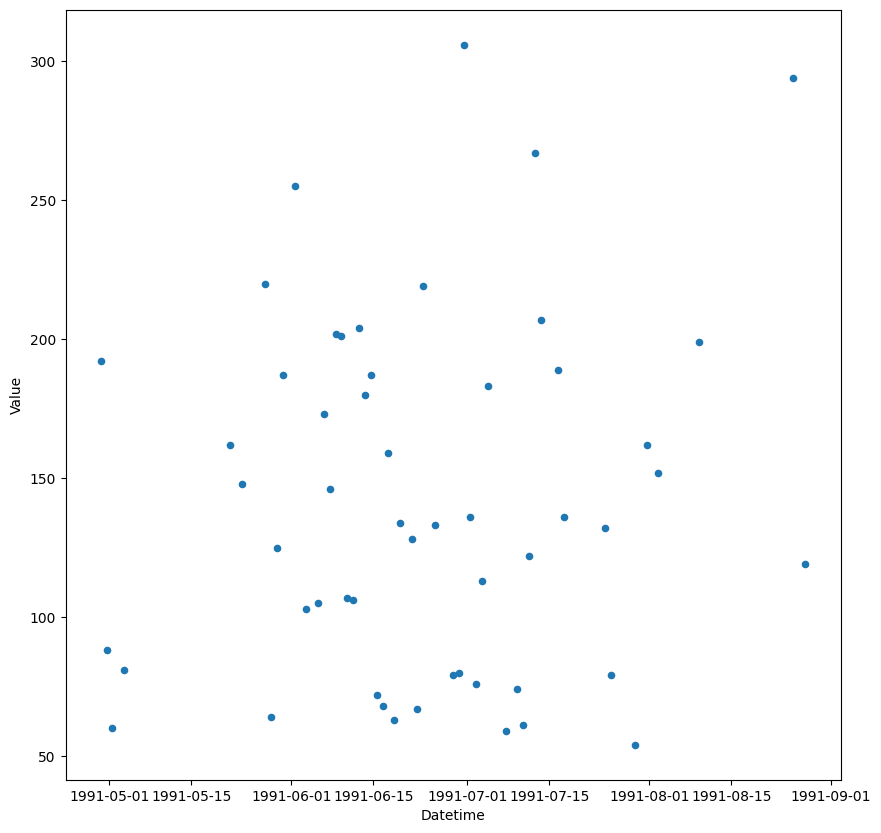

In [ ]:
query = "Code == 60"
# Select rows to plot using query
rows_to_plot = d01.query(query)
# Plot the selected rows
rows_to_plot.plot(x = 'Datetime', y = 'Value', kind = 'scatter', figsize = (10, 10))
plt.show()

In [ ]:
d01["Code"].unique()

array([58, 33, 34, 62, 48, 65, 60])

In [ ]:
rows_to_plot

,Date,Time,Code,Value,Datetime
1,04-21-1991,9:09,33,9,1991-04-21 09:09:00
4,04-21-1991,17:08,33,7,1991-04-21 17:08:00
7,04-22-1991,7:35,33,10,1991-04-22 07:35:00
9,04-22-1991,13:40,33,2,1991-04-22 13:40:00
11,04-22-1991,16:56,33,7,1991-04-22 16:56:00
...,...,...,...,...,...
931,09-01-1991,17:41,33,7,1991-09-01 17:41:00
934,09-02-1991,8:51,33,9,1991-09-02 08:51:00
936,09-02-1991,13:00,33,4,1991-09-02 13:00:00
938,09-02-1991,17:30,33,7,1991-09-02 17:30:00
